## Observations and Insights 

Among 'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin' treatments, Capomulin has a more effective outcome on decreasing the Tumor size.

A timespan of 45 days is required for this trial to test the effectiveness of the treatments.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:

# Combine the data into a single dataset

data = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])

# Display the data table for preview
data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice_unique = data["Mouse ID"].unique()
print(len(mice_unique))


249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

mice_duplicate = data.duplicated(['Mouse ID', 'Timepoint'])
mice_duplicate


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = data.drop_duplicates(['Mouse ID', 'Timepoint'])
cleaned_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_data.count()

Mouse ID               1888
Drug Regimen           1888
Sex                    1888
Age_months             1888
Weight (g)             1888
Timepoint              1888
Tumour Volume (mm3)    1888
Metastatic Sites       1888
dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
tumor_vol_by_regimen = cleaned_data['Tumour Volume (mm3)'].groupby(
    cleaned_data['Drug Regimen'])

_mean = tumor_vol_by_regimen.mean()
_median = tumor_vol_by_regimen.median()
_variance = tumor_vol_by_regimen.var()
_std_dev = tumor_vol_by_regimen.std()
_sem = tumor_vol_by_regimen.sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumour volume.
# Assemble the resulting series into a single summary dataframe.

summary_data = pd.DataFrame({
    "Mean Tumour Vol": _mean,
    "Median Tumour Vol": _median,
    "Tumour Vol Variance": _variance,
    "Tumour Vol Standard Deviation.": _std_dev,
    "Tumour Vol SEM": _sem
})

summary_data.reset_index()


,Drug Regimen,Mean Tumour Vol,Median Tumour Vol,Tumour Vol Variance,Tumour Vol Standard Deviation.,Tumour Vol SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregated_data = cleaned_data.groupby("Drug Regimen").agg({
    "Tumour Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})

aggregated_data


Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Total number of timepoints for all mice tested for each drug regimen')

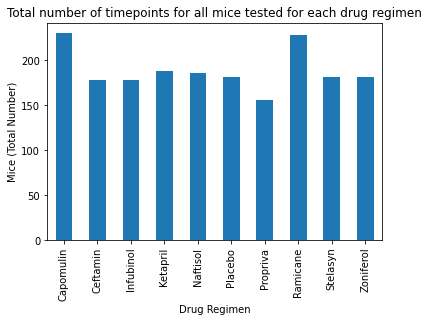

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

all_mice = tumor_vol_by_regimen.count()

_plot = all_mice.plot(kind='bar')
_plot.set_ylabel('Mice (Total Number)')
_plot.set_title(
    'Total number of timepoints for all mice tested for each drug regimen')


Text(0, 0.5, 'Mice (Total Number)')

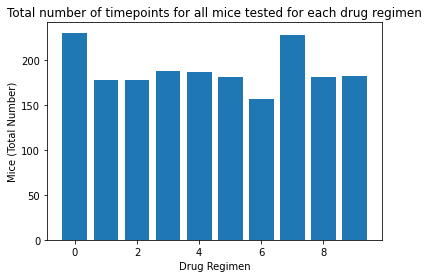

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

import numpy as np

_x_axis = np.arange(len(all_mice))
_tick_loc = [value for value in _x_axis]

plt.bar(_x_axis, all_mice)
plt.title('Total number of timepoints for all mice tested for each drug regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Mice (Total Number)')


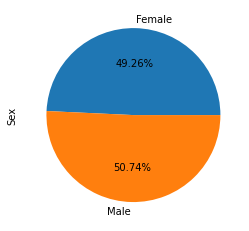

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

grouped_by_sex = cleaned_data.groupby('Sex')
grouped_by_sex_count = pd.Series(grouped_by_sex['Sex'].count())

pie_chart = grouped_by_sex_count.plot(kind='pie', autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x277daaca7a0>,
 [Text(0.02562299800632446, 1.099701533132135, 'Female'),
  Text(-0.025623100967812958, -1.099701530733132, 'Male')],
 [Text(0.01397618073072243, 0.5998371998902553, '49.26%'),
  Text(-0.01397623689153434, -0.5998371985817083, '50.74%')])

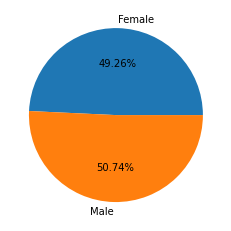

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(grouped_by_sex_count,
        labels=grouped_by_sex_count.index.values, autopct='%1.2f%%')


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

cric = cleaned_data.loc[((cleaned_data["Drug Regimen"] == 'Capomulin') |
                         (cleaned_data["Drug Regimen"] == 'Ramicane') |
                         (cleaned_data["Drug Regimen"] == 'Infubinol') |
                         (cleaned_data["Drug Regimen"] == 'Ceftamin')), :]

# Start by getting the last (greatest) timepoint for each mouse
cric_time = cric.groupby(["Mouse ID"])['Timepoint']
cric_time_max = pd.DataFrame(cric_time.max())
cric_time_max.head()


,Timepoint
Mouse ID,
a203,45
a251,45
a275,45
a411,45
a444,45


In [15]:

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
cric_merge = pd.merge(cric_time_max, cleaned_data,
                      on=['Mouse ID', 'Timepoint'])

cric_merge.reset_index()
cric_merge


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

cric_lists = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumour vol data (for plotting)
cric_tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
for cric_list in cric_lists:

    # Locate the rows which contain mice on each drug and get the tumour volumes
    tumor_vol = cric_merge.loc[cric_merge['Drug Regimen']
                               == cric_list, 'Tumour Volume (mm3)']

    # add subset
    cric_tumor_vol.append(tumor_vol)

    # Determine outliers using upper and lower bounds
    _quartiles = tumor_vol.quantile([.25, .5, .75])
    _lower_q = _quartiles[0.25]
    _upper_q = _quartiles[0.75]
    _delta_q = _upper_q - _lower_q
    _lower_bound = _lower_q - (1.5*_delta_q)
    _upper_bound = _upper_q + (1.5*_delta_q)

    print(f"The outlier can be the value of {cric_list} higher than {_upper_bound}.")
    print(f"The outlier can be the value of {cric_list} lower than {_lower_bound}.")
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>") 

The outlier can be the value of Capomulin higher than 51.83201549.
The outlier can be the value of Capomulin lower than 20.70456164999999.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The outlier can be the value of Ramicane higher than 54.30681135.
The outlier can be the value of Ramicane lower than 17.912664470000003.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The outlier can be the value of Infubinol higher than 82.74144559000001.
The outlier can be the value of Infubinol lower than 36.83290494999999.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The outlier can be the value of Ceftamin higher than 87.66645829999999.
The outlier can be the value of Ceftamin lower than 25.355449580000002.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [17]:
# cric_tumor_vol

In [18]:
# cric_lists

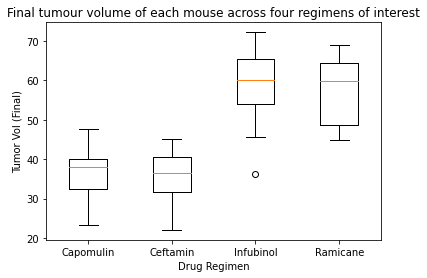

In [19]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest

plt.boxplot(cric_tumor_vol, labels=sorted(cric_lists))
plt.title('Final tumour volume of each mouse across four regimens of interest')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Vol (Final)')
plt.show()


## Line and Scatter Plots

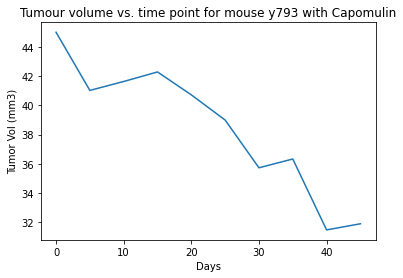

In [20]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
mouse_y793 = cleaned_data.loc[cleaned_data['Mouse ID'] == 'y793', :]
tumor_vol_y793 = mouse_y793['Tumour Volume (mm3)']
timepoint_y793 = cleaned_data['Timepoint'].unique()

plt.plot(timepoint_y793, tumor_vol_y793)
plt.title('Tumour volume vs. time point for mouse y793 with Capomulin')
plt.xlabel('Days')
plt.ylabel('Tumor Vol (mm3)')
plt.show()


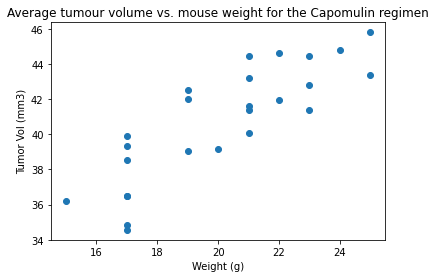

In [21]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen

_regimen_capomulin = cleaned_data.loc[cleaned_data["Drug Regimen"]
                                      == 'Capomulin', :]
_regimen_capomulin_grouped = _regimen_capomulin.groupby(['Mouse ID'])

avg_mice_weight = _regimen_capomulin_grouped['Weight (g)'].mean()
avg_tumour_volume = _regimen_capomulin_grouped['Tumour Volume (mm3)'].mean()

plt.scatter(avg_mice_weight, avg_tumour_volume)
plt.title('Average tumour volume vs. mouse weight for the Capomulin regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Vol (mm3)')
plt.show()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

correlation = st.pearsonr(avg_mice_weight, avg_tumour_volume)
correlation

PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712483e-07)

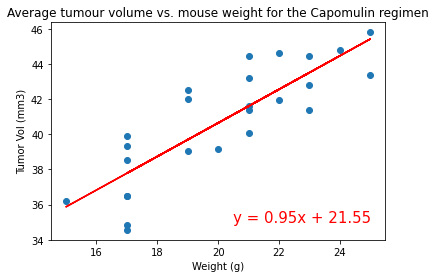

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_mice_weight, avg_tumour_volume )
regress_values = avg_mice_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(avg_mice_weight,avg_tumour_volume)
plt.plot(avg_mice_weight,regress_values,"r-")
plt.annotate(line_eq,(20.5,35),fontsize=15,color="red")
plt.title('Average tumour volume vs. mouse weight for the Capomulin regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Vol (mm3)')
plt.show()
